In [1]:
print('Hello World!')

Hello World!


In [4]:
# Удостоверимся, что все нужные библиотеки установлены
%pip install numpy matplotlib
%pip install torch torchvision -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [8]:
# Импортируем нужные библиотеки
import numpy as np
from matplotlib import pyplot as plt
import torch
# Команда, чтобы все графики отображались как картинки в выходе
%matplotlib inline

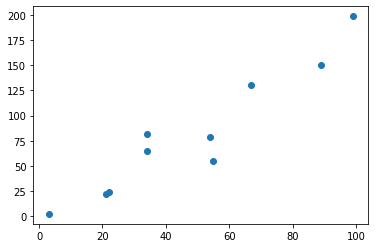

In [9]:
# Определим входные данные алгоритма
x = [3,21,22,34,54,34,55,67,89,99]
x = np.array(x)
y = [2,22,24,65,79,82,55,130,150,199]
y = np.array(y)

# Отобразим эти входные данные
plt.scatter(x, y)
# Можно заметить линейную зависимость данных в этом графике

In [17]:
# Определение модели данных
# В данном случае простая линейная модель с двумя параметрами
def model(data_x, weight, bias):
  return weight * data_x + bias

# Функция потерь
# В данном случае MSE(Mean Squared Error)
def loss_function(pred_y, true_y):
  diff = pred_y - true_y
  return 0.5 * (diff * diff).mean()

In [58]:
# Функция оптимизации
# Обновляет параметры модели так,
# чтобы она чуть лучше справлялась с поставленной задачей
def optimize(x, y, weight, bias, learning_rate):
  # Для нахождения градиентов используем PyTorch
  # Для начала отдадим ему текущие значения нужных переменных
  w = torch.tensor(weight, requires_grad=True)
  b = torch.tensor(bias, requires_grad=True)
  x = torch.tensor(x, requires_grad=False)
  y = torch.tensor(y, requires_grad=False)
  # Прогоним их через модель, а потом через функцию потерь
  pred_y = model(x, w, b)
  loss = loss_function(pred_y, y)
  # Эта функция автоматически находит градиенты за нас
  # и сохраняет их внутри параметров модели
  # И не надо выводить никакие формулы
  loss.backward()

  # Просто градиентный спуск - без всяких наворотов
  weight = weight - learning_rate * w.grad.numpy()
  bias = bias - learning_rate * b.grad.numpy()

  # Возвращаем обновлённые параметры
  return weight, bias

# Функция инициализирует модель, обновляет её N раз, затем выводит результаты
def iterate_and_display_results(start_w, start_b, learning_rate, x, y, epochs):
  w, b = start_w, start_b
  for _ in range(epochs):
    w, b = optimize(x, y, w, b, learning_rate)
  
  pred_y = model(x, w, b)
  loss = loss_function(pred_y, y)
  print(w, b, loss)
  plt.scatter(x, y)
  plt.plot(x, pred_y, 'r-')

In [24]:
# Начальные значения для модели
w = np.random.rand(1)
print(w)
b = np.random.rand(1)
print(b)
Lr = 0.000001

[0.77937551]
[0.65736284]


[0.7824016] [0.65740573] 1639.893878919213


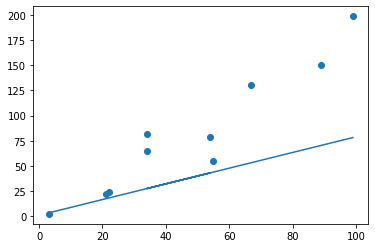

In [25]:
iterate_and_display_results(w, b, Lr, x, y, 1)

[0.78541819] [0.65744847] 1630.8065198372467


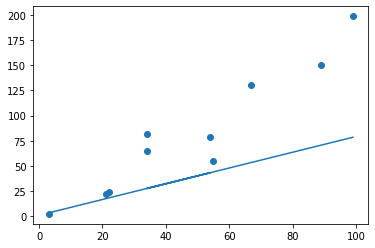

In [55]:
iterate_and_display_results(w, b, Lr, x, y, 2)

[0.78842531] [0.65749107] 1621.7761492708835


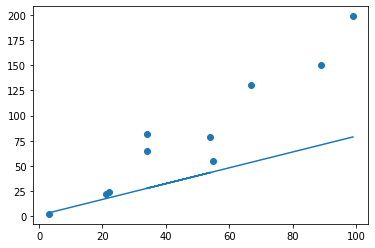

In [56]:
iterate_and_display_results(w, b, Lr, x, y, 3)

[0.79142298] [0.65753353] 1612.8024098341634


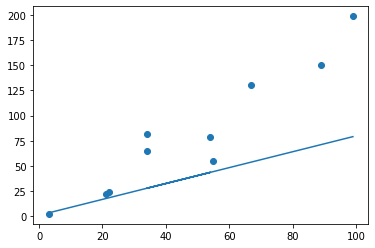

In [57]:
iterate_and_display_results(w, b, Lr, x, y, 4)

[0.79441124] [0.65757584] 1603.8849463823651


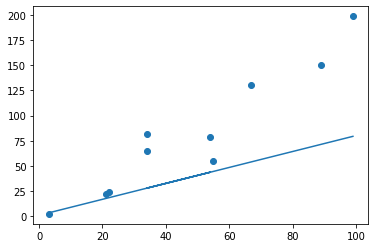

In [26]:
iterate_and_display_results(w, b, Lr, x, y, 5)

[1.74340666] [0.64023902] 190.7304560535162


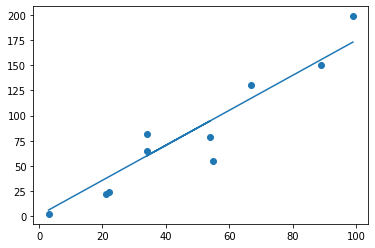

In [27]:
iterate_and_display_results(w, b, Lr, x, y, 10000)

In [37]:
# Чтобы ответить на вопрос в Задании 2, поменяем исходные данные
# Первый набор
x1 = np.random.rand(64) * 50
y1 = 1.25 * x1 + 13.37

# Второй набор
x2 = np.random.rand(64) * 50
y2 = np.random.rand(64) * 50

[1.25] [13.37] 2.285990920696366e-18


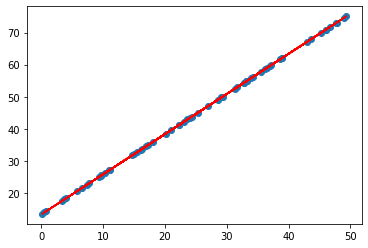

In [59]:
iterate_and_display_results(w, b, 0.001, x1, y1, 90000)

[-0.0718141] [25.41693792] 86.0313381164157


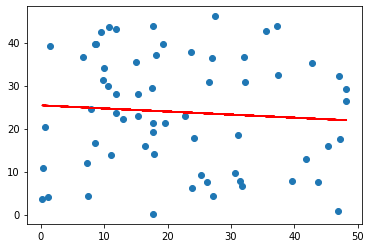

In [60]:
iterate_and_display_results(w, b, 0.001, x2, y2, 90000)

[0.80916627] [0.65778457] 1560.2647016982726


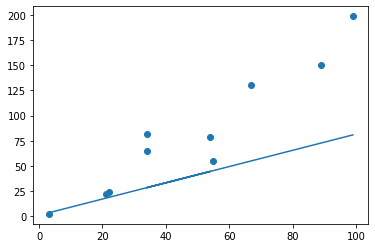

In [42]:
iterate_and_display_results(w, b, 0.000000001, x, y, 10000)

[1.8753365] [-8.02497872] 173.43421007315357


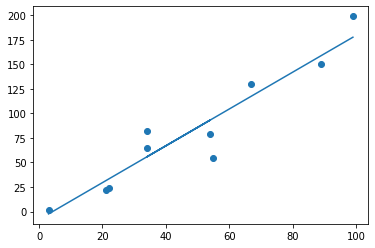

In [54]:
iterate_and_display_results(w, b, 0.0005, x, y, 10000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract


[nan] [nan] nan


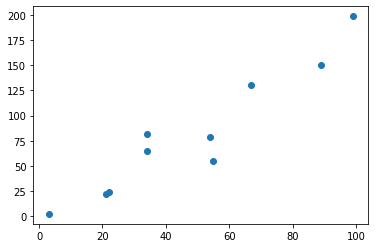

In [43]:
iterate_and_display_results(w, b, 0.5, x, y, 10000)